# Profitable App Profiles for the App Store and Google Play Markets

# Table of Content

1. Introduction

2. Imports

3. Loading Datasets

4. Data Assessing

5. Data Cleaning

6. Data Analysis

7. Conclusion

8. Summary

9. Future Recommendations

# 1. Introduction 

The goal of this simple analysis is to provide assistance to a company that must find profitable mobile app profiles for the App Store and Google Play markets. The company builds Android and iOS mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

The company only builds apps that are free to download and install, and the main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use the app. The goal for this project is to analyze data to help the developers understand what kinds of apps are likely to attract more users.

This project will be simple in nature where data cleaning and data analysis will be performed to deliver a result for the business problem.

# 2. Imports

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Loading Datasets

In [3]:
ios_df = pd.read_csv('AppleStore.csv')

In [4]:
android_df = pd.read_csv('googleplaystore.csv')

# 4. Data Assessing

In [5]:
ios_df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [6]:
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
ios_df.shape

(7197, 16)

In [8]:
ios_df.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

There are 7197 iOS apps in this data set, and the columns that seem interesting are: `'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'`

In [9]:
android_df.shape

(10841, 13)

In [10]:
android_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Google Play data set has 10841 apps and 13 columns. At a quick glance, the columns that might be useful for the purpose of our analysis are `'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'`.

There is a row in android dataframe that has confusing data for the features given:

In [11]:
android_df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Category is the give away that something went wrong when adding this information to the dataset, so it'll be dropped.

In [12]:
len(android_df)

10841

In [13]:
android_df = android_df.drop([10472],axis=0)

In [14]:
# we expect to have one less row
len(android_df)

10840

Since we are purely interested in free apps, we should focus on apps with **$0 price**. We should look at popular ones, so we want to view **user rating** and **ratings** in both data sets. The **number of installs** would be good to look at in android data. We could look at **genres** also to see which is more popular.

# 5. Data Cleaning

### Duplicates

In [15]:
# finding duplicate ios apps 
ios_df.duplicated(subset='track_name').value_counts()

False    7195
True        2
dtype: int64

There are only 2 apps that are duplicated and we'll use the total rating count column to drop the one with the lowest count.

In [16]:
# displaying duplicates
ios_df[ios_df.duplicated('track_name',keep=False)].sort_values(['track_name','rating_count_tot'],ascending=False)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


In [17]:
# droppping duplicates
ios_df = ios_df.sort_values(['track_name','rating_count_tot'],ascending=False).drop_duplicates('track_name',keep='first').sort_values(['track_name','rating_count_tot'],ascending=False)

In [18]:
# checking for duplicates
ios_df.duplicated(subset='track_name').value_counts()

False    7195
dtype: int64

In [19]:
# finding duplicate android apps 
android_df.duplicated(subset='App').value_counts()

False    9659
True     1181
dtype: int64

There are 1181 rows with duplicate app names. Let's explore a few:

In [20]:
# displaying duplicates
android_df[android_df.duplicated('App',keep=False)].sort_values(['App','Reviews'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up


Although most features for an instance are the same, the reviews are vary. We will drop the duplicates and keep the item with the highest reviews.

In [21]:
# droppping duplicates
android_df = android_df.sort_values(['App','Reviews'],ascending=False).drop_duplicates('App',keep='first').sort_values(['App','Reviews'],ascending=False)

In [22]:
# checking for duplicates
android_df.duplicated(subset='App').value_counts()

False    9659
dtype: int64

### App Names with Special Characters

The datasets contain apps with special characters, that may be for international reasons or decorum. For ease, apps that are not mostly english characters will be removed.

In [23]:
# function for finding english only apps
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True

In [24]:
ios_df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
6759,1059271164,ｗｗｗ,14366720,USD,0.00,0,0,0.0,0.0,1.0.1,4+,Games,40,4,2,1
6715,1090842524,Ｘ:15秒の人気 アクション ゲーム,131354624,USD,0.00,0,0,0.0,0.0,1.2.6,4+,Games,40,4,1,1
6744,1181724803,ＣＲスーパー海物語ＩＮ沖縄４,3503480832,USD,9.99,0,0,0.0,0.0,1.0.2,12+,Games,40,0,1,0
7174,1168593601,２ちゃんねる for iPhone,21508096,USD,0.00,0,0,0.0,0.0,3.0,17+,News,37,0,1,1
7025,1104879125,애드픽 - 인플루언서가 되어 의미있는 수익을 올리세요!,28006400,USD,0.00,0,0,0.0,0.0,1.0.9,12+,Business,37,5,4,1


In [25]:
ios_english = ios_df[ios_df['track_name'].apply(is_english)]

In [27]:
#ios_english

In [26]:
android_english = android_df[android_df['App'].apply(is_english)]

In [28]:
#android_english

### Free Apps

In [29]:
ios_english.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [30]:
android_english.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [31]:
ios_free = ios_english[ios_english['price'] == 0]

In [32]:
android_free = android_english[android_english['Price'] == '0']

In [33]:
# convert android price to integer
android_free['Price'] = android_free['Price'].map({'0':0})

<ipython-input-33-87a75aa1fc86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_free['Price'] = android_free['Price'].map({'0':0})


# 6. Data Analysis

So far, cleaning data entailed:
- removing inaccurate data
- removing duplicate app entries
- removing non english apps
- isolating free apps

We want to determine apps that will attract more users because revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, the validation strategy for an app idea is comprised of 3 steps:
1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app generates a good repsonse from users, it will be further developed.
3. If the app is profitable after 6 months, we also build an iOS version of the app and add it to the App Store.

Our end goal is to add the app on both the Google Play Store and App Store, so we need to find app profiles that are successful in both markets.

We begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the prime_genre(index 11) column of the App Store data set, and the Genres(index 9) and Category(index 1) columns of the Google Play data set.

### iOS Genres

In [102]:
total_apps = len(ios_free)

In [103]:
genres = ios_free.groupby('prime_genre').count()['id']

In [104]:
genre_rate = genres/total_apps * 100

In [105]:
genre_rate = pd.DataFrame(data=genre_rate)

In [106]:
genre_rate.columns = ['percentage']

In [107]:
genre_rate = genre_rate.sort_values('percentage')

<AxesSubplot:xlabel='percentage', ylabel='prime_genre'>

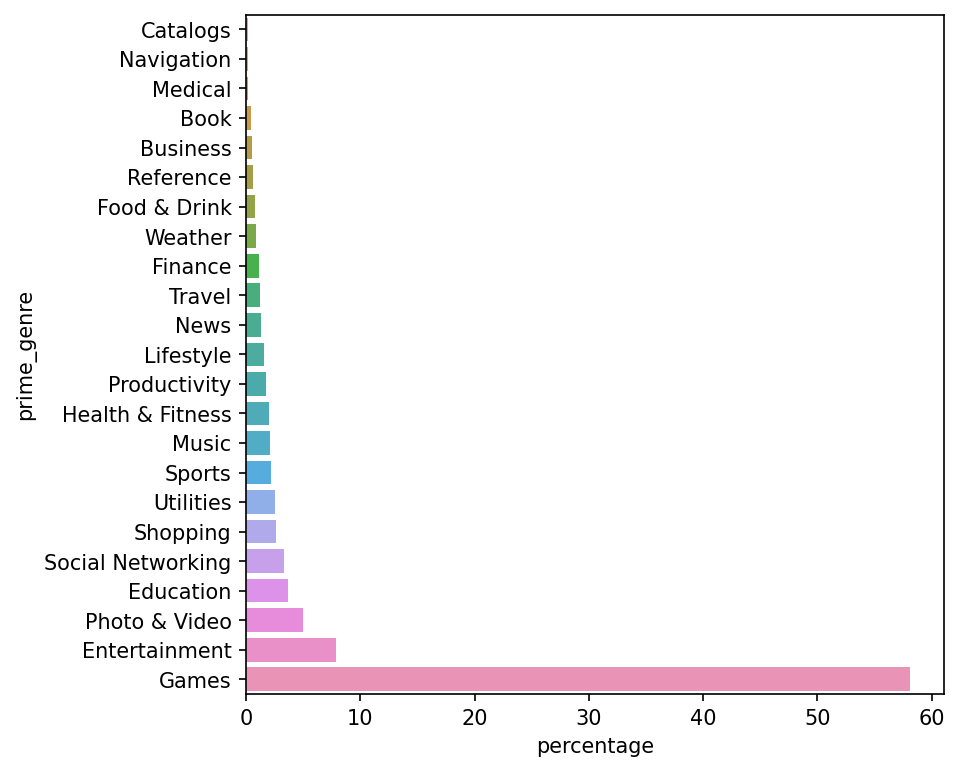

In [113]:
plt.figure(figsize=(6,6),dpi=150)
sns.barplot(data=genre_rate,y=genre_rate.index,x='percentage')

The most common iOS genre is Games at 58.16%, followed by Entertainment almost at 8%. Photo & video is almost 5%, education is 3.66%, and social netowrking is 3.29%
Games is more than half of the free english apps on the App Store. The most popular apps could be the ones for fun (games, entertainment, photo and vid, social networking, etc.) and the less popular ones have to do with practicality ( education, shopping, utilities, sports, lifestyle, etc.).
We should investigate the number of users on these apps.

### Andriod Genres and Categories

In [169]:
total_apps = len(android_free)

In [170]:
genres = android_free.groupby('Genres').count()['App']

In [171]:
genre_rate = genres/total_apps * 100

In [172]:
genre_rate = pd.DataFrame(data=genre_rate)

In [173]:
genre_rate.columns = ['percentage']

In [174]:
genre_rate = genre_rate.sort_values('percentage')

In [175]:
# removing genres with less than 0.5%
genre_rate = genre_rate[genre_rate['percentage'] >= 0.5]

<AxesSubplot:xlabel='percentage', ylabel='Genres'>

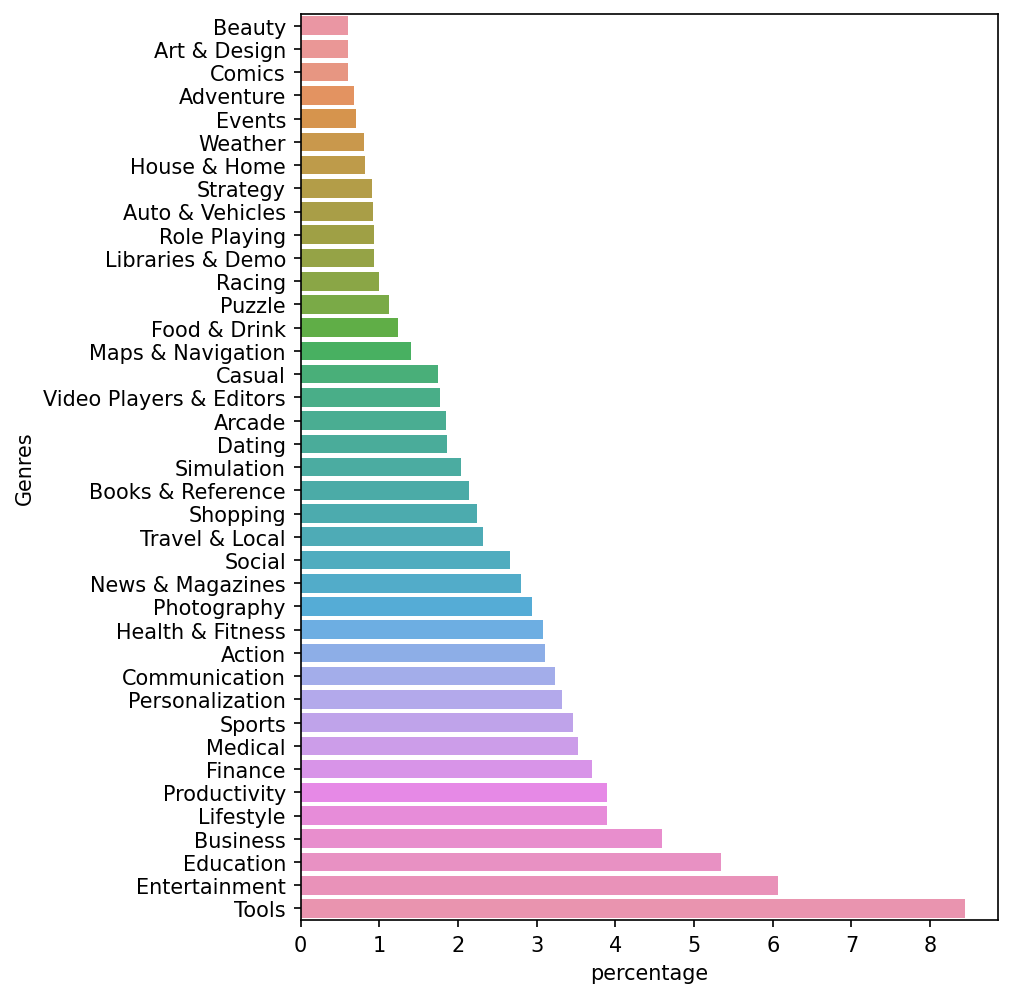

In [150]:
plt.figure(figsize=(6,8),dpi=150)
sns.barplot(data=genre_rate,y=genre_rate.index,x='percentage')

The most common android genres are Tools at 8.44%, Entertainment at 6%, Education at 5.34%, and Business at 4.6%.
There isn't a genre that dominates the store in the case of the App Store. There are many more genres in this case that have been removed as the percentages were very small.
This might not be the best column to analyze for the android data.

In [151]:
category = android_free.groupby('Category').count()['App']

In [152]:
cat_rate = category/total_apps * 100

In [153]:
cat_rate = pd.DataFrame(data=cat_rate)

In [154]:
cat_rate.columns = ['percentage']

In [155]:
cat_rate = cat_rate.sort_values('percentage')

<AxesSubplot:xlabel='percentage', ylabel='Category'>

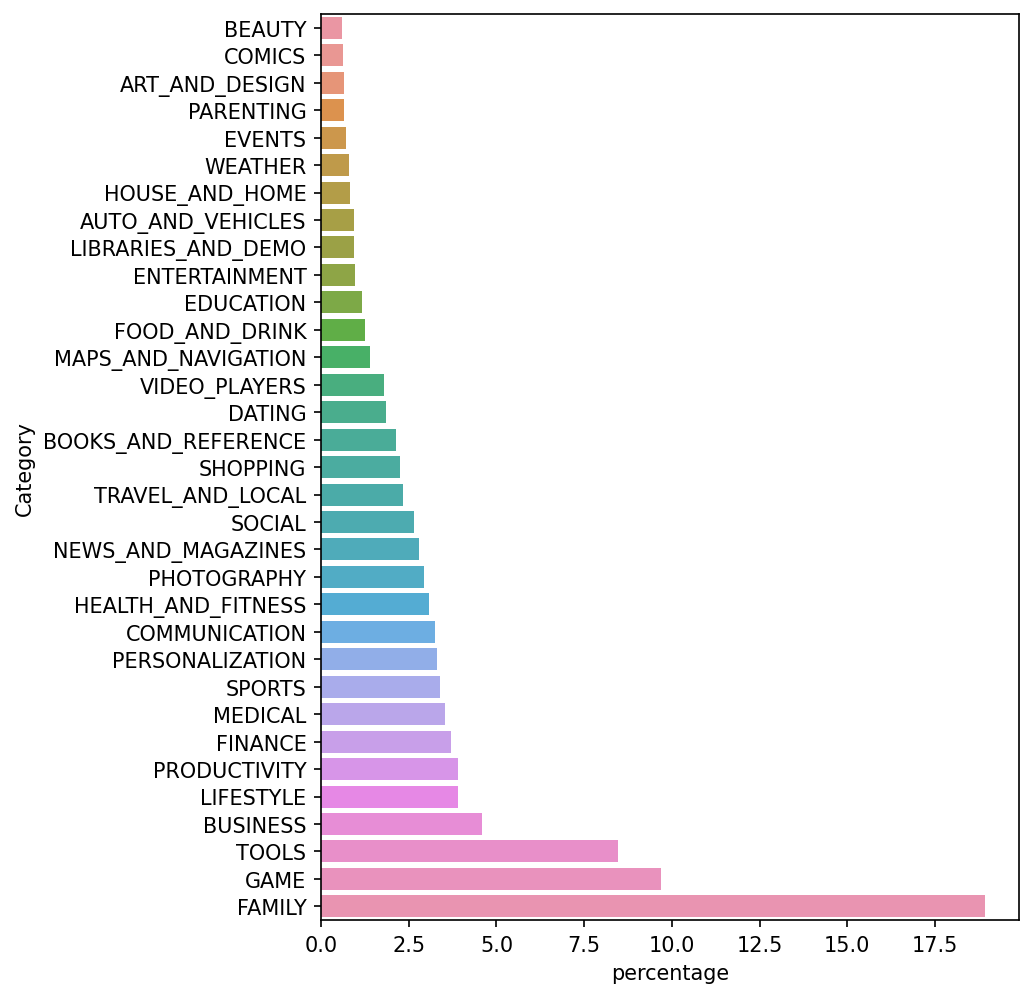

In [156]:
plt.figure(figsize=(6,8),dpi=150)
sns.barplot(data=cat_rate,y=cat_rate.index,x='percentage')

The most common android category is family at almost 19%, games at 9.7%, tools at 8.46 %, and business at 4.6%.
The order shows that app popularity is geared toward more practical purposes (family, tools, business, lifestyle, productivity, etc.), however, investigating further shows that family category is games for kids. 
We should investigate the number of users on these apps.

### iOS Users by Genres

To find the average number of users by genre, we will sum the `rating_count_tot` by genre and then divide by the count of each genre.

In [194]:
avg_num_user_ios = ios_free.groupby('prime_genre').sum()['rating_count_tot']/ios_free.groupby('prime_genre').count()['id']

In [195]:
avg_num_user_ios = pd.DataFrame(data=avg_num_user_ios)

In [197]:
avg_num_user_ios.columns = ['avg_num_users']

In [199]:
avg_num_user_ios = avg_num_user_ios.sort_values('avg_num_users')

<AxesSubplot:xlabel='avg_num_users', ylabel='prime_genre'>

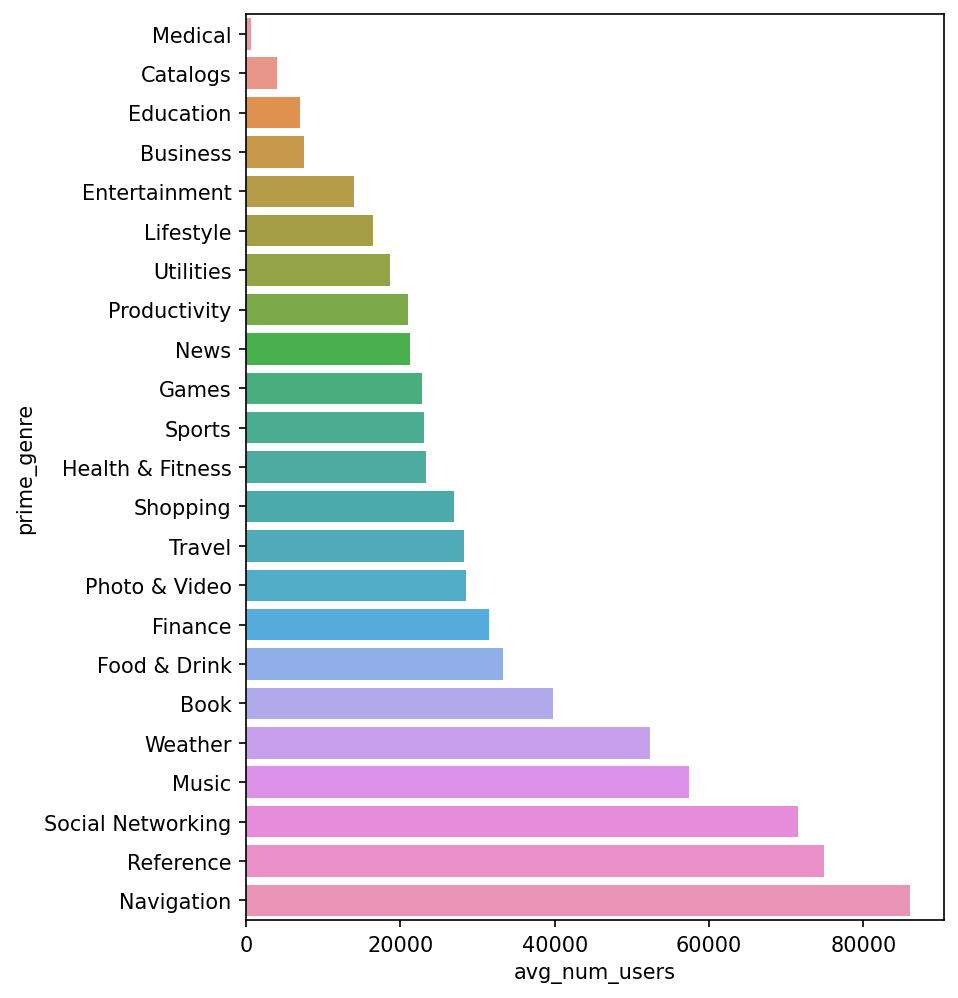

In [201]:
plt.figure(figsize=(6,8),dpi=150)
sns.barplot(data=avg_num_user_ios,
            y=avg_num_user_ios.index,
            x='avg_num_users')

The average number of users is highest for navigation, reference, social networking, and music. As navigation and reference aren't considered fun, it's best to recommend a genre like books for its practicality and potential to reach the popularity of navigation.

### Android Users by Category

#### Percentage of Installs for amount of apps installed

In [212]:
installs = pd.DataFrame(data=android_free.groupby('Installs').count()['App']/len(android_free) * 100)

In [214]:
installs.columns = ['install_percentage']

In [215]:
installs = installs.sort_values('install_percentage')

In [216]:
installs

,install_percentage
Installs,
0,0.011284
0+,0.045137
"1,000,000,000+",0.225683
"500,000,000+",0.270819
1+,0.507786
5+,0.789889
50+,1.918303
"100,000,000+",2.121417
"50,000,000+",2.290679


<AxesSubplot:xlabel='install_percentage', ylabel='Installs'>

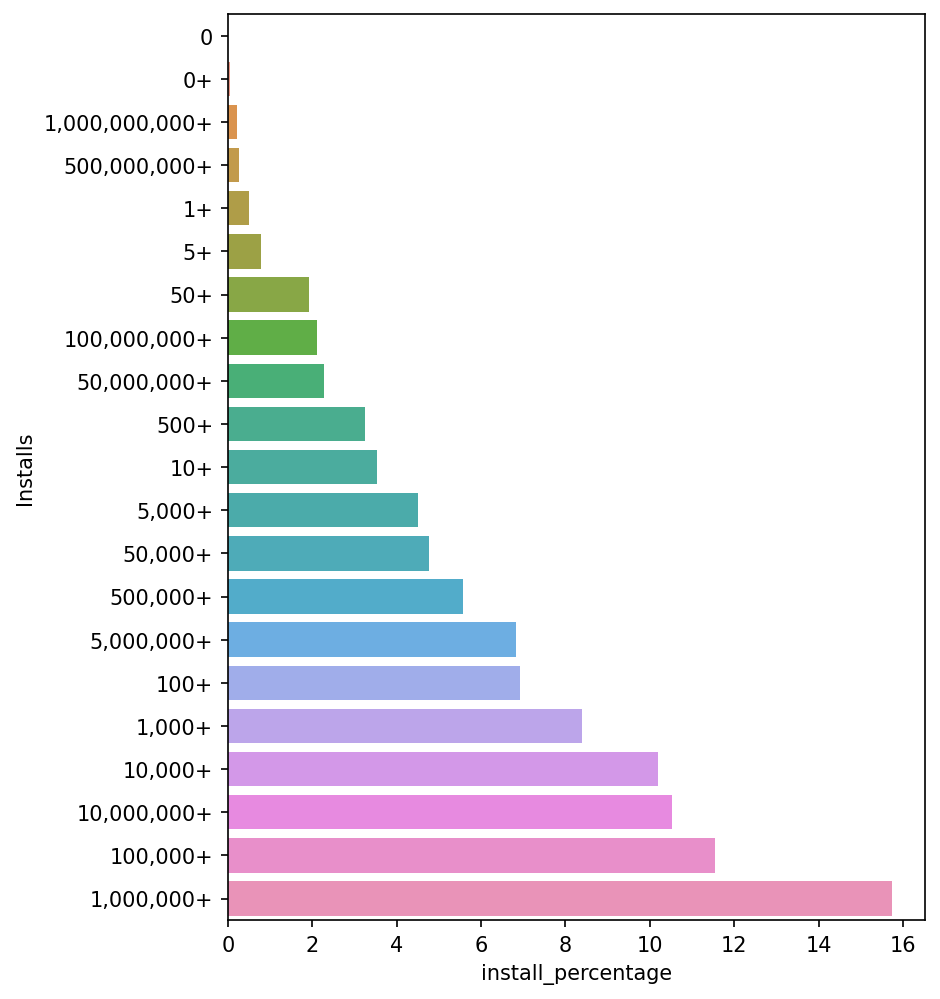

In [246]:
plt.figure(figsize=(6,8),dpi=150)
sns.barplot(data=installs,
            y=installs.index,
            x='install_percentage')

Apps that had 1,000,000+ installs were the highest at 15.74%.

Apps that had over 100,000,000+ installs are on the lower end. This will be useful if we have to remove some data.

#### Installs by Categories

In [224]:
android_free['Installs'] = android_free['Installs'].str.replace('+','').str.replace(',','').astype(float)

<ipython-input-224-40d2503722ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_free['Installs'] = android_free['Installs'].str.replace('+','').str.replace(',','').astype(float)


In [238]:
num_installs_cat = pd.DataFrame(data=round(android_free.groupby('Category').sum()['Installs']/android_free.groupby('Category').count()['App'],2))

In [239]:
num_installs_cat.columns = ['avg_num_installs']

In [240]:
num_installs_cat = num_installs_cat.sort_values('avg_num_installs')

In [241]:
num_installs_cat

,avg_num_installs
Category,
MEDICAL,120616.49
EVENTS,253542.22
BEAUTY,513151.89
PARENTING,542603.62
LIBRARIES_AND_DEMO,638503.73
AUTO_AND_VEHICLES,647317.82
COMICS,817657.27
DATING,854028.83
HOUSE_AND_HOME,1331540.56


<AxesSubplot:xlabel='avg_num_installs', ylabel='Category'>

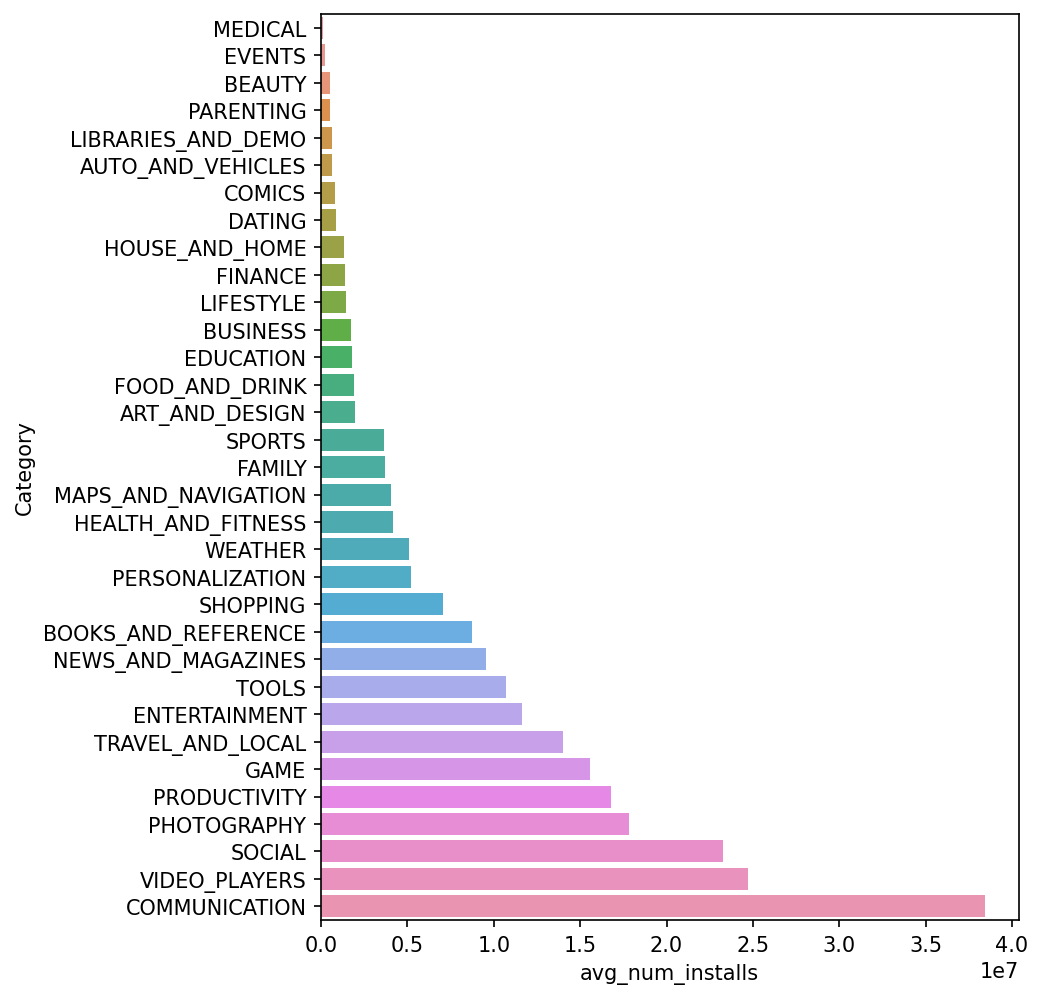

In [242]:
plt.figure(figsize=(6,8),dpi=150)
sns.barplot(data=num_installs_cat,
            y=num_installs_cat.index,
            x='avg_num_installs')

Communications has about 38 million users, video players has about 24.7 million users, and photography has about 18 million users. Communications has the highest audience and the best chance to bring in more users. Video players is also a good option to target because we see that we can increase users to the level of communications users.

We can analyze the amount of installs by app for communication apps.

In [254]:
android_free[(android_free['Category'] == 'COMMUNICATION') & (android_free['Installs'] >= 100000000)][['App','Installs']]

,App,Installs
383,imo free video calls and chat,5.000000e+08
346,imo beta free calls and text,1.000000e+08
4800,Yahoo Mail – Stay Organized,1.000000e+08
393,Who,1.000000e+08
336,WhatsApp Messenger,1.000000e+09
4712,WeChat,1.000000e+08
4676,Viber Messenger,5.000000e+08
4633,UC Browser Mini -Tiny Fast Private & Secure,1.000000e+08
420,UC Browser - Fast Download Private & Secure,5.000000e+08
4602,"Truecaller: Caller ID, SMS spam blocking & Dialer",1.000000e+08


Now, we can get rid of apps that have an excess of 100,000,000 installs and see how the averages change.

In [256]:
android_under_100 = android_free[android_free['Installs'] < 100000000]

In [260]:
num_installs_cat = pd.DataFrame(data=round(android_under_100.groupby('Category').sum()['Installs']/android_under_100.groupby('Category').count()['App'],2))
num_installs_cat.columns = ['avg_num_installs']
num_installs_cat = num_installs_cat.sort_values('avg_num_installs')
num_installs_cat

,avg_num_installs
Category,
MEDICAL,120616.49
EVENTS,253542.22
BEAUTY,513151.89
PARENTING,542603.62
LIBRARIES_AND_DEMO,638503.73
AUTO_AND_VEHICLES,647317.82
COMICS,817657.27
DATING,854028.83
FINANCE,1086125.79


<AxesSubplot:xlabel='avg_num_installs', ylabel='Category'>

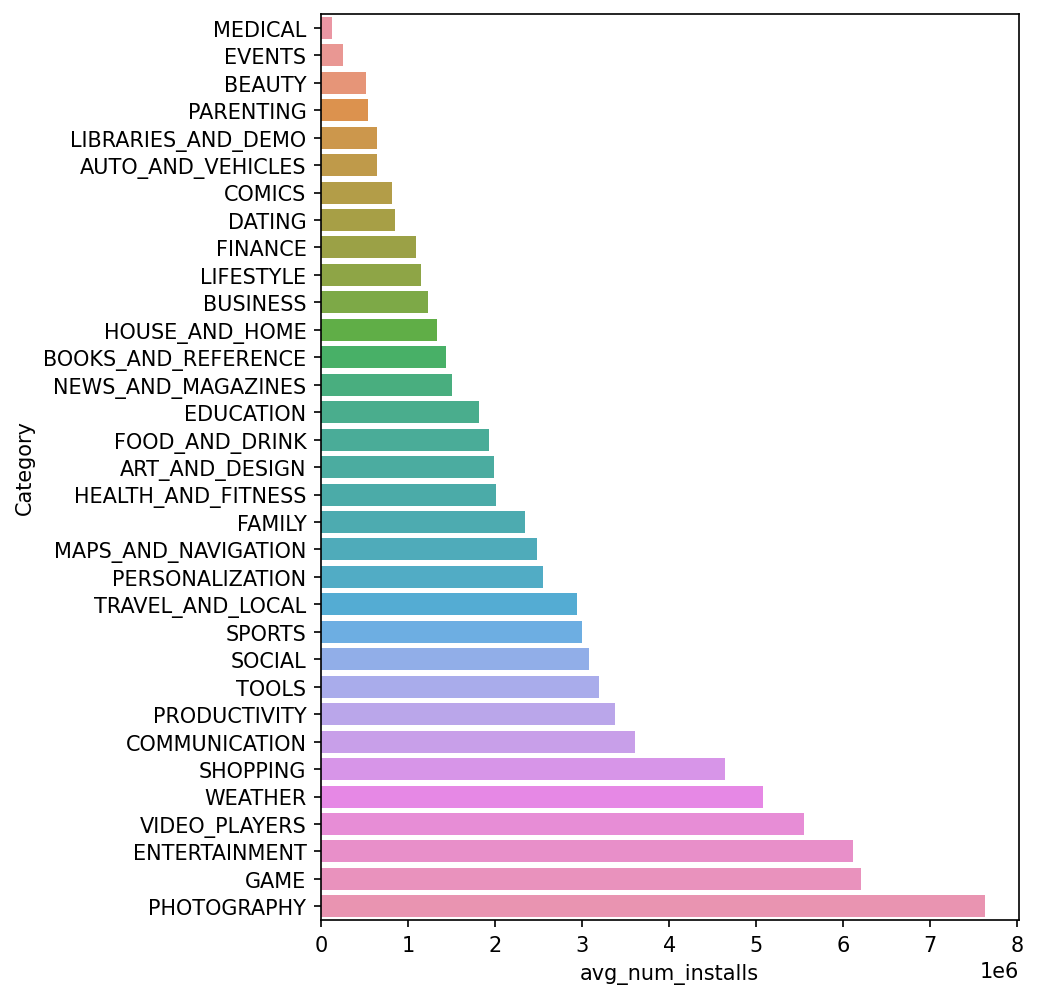

In [261]:
plt.figure(figsize=(6,8),dpi=150)
sns.barplot(data=num_installs_cat,
            y=num_installs_cat.index,
            x='avg_num_installs')

The average for communications installs is a heavy decrease, nearly down 35 million to 3 million. Communication now has a chance to play catch with the top categories. The order has changed slightly, with photography having the most downloads, followed by game and entrertainment. 

We see the same pattern for the video players category, which is up there at 5.5 million installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

The main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 1.4 million. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

### Exploring Books and Reference Apps

In [267]:
android_under_100[android_under_100['Category'] == 'BOOKS_AND_REFERENCE'][['App','Installs']].sort_values('Installs',ascending=False)

,App,Installs
9625,JW Library,10000000.0
149,FBReader: Favorite Book Reader,10000000.0
9621,Dictionary - Merriam-Webster,10000000.0
8293,Dictionary,10000000.0
144,Cool Reader,10000000.0
...,...,...
6844,Khrifa Hla Bu (Solfa),10.0
8146,CZ-Help,5.0
9993,EW PDF,5.0
8119,BibleRead En Cy Zh Yue,5.0


There is potential to launch a new app into popularity. We can investigate the apps that fall in the middle region of over 1 million and under 100 million installs.

In [272]:
android_under_100[(android_under_100['Installs'] >= 1000000) & (android_under_100['Category'] == 'BOOKS_AND_REFERENCE')][['App','Installs']]

,App,Installs
8644,wikiHow: how to do anything,1000000.0
168,eBoox: book reader fb2 epub zip,1000000.0
142,Wikipedia,10000000.0
7780,Stats Royale for Clash Royale,1000000.0
9570,Spanish English Translator,10000000.0
5561,Satellite AR,1000000.0
161,ReadEra – free ebook reader,1000000.0
166,Read books online,5000000.0
5345,Quran for Android,10000000.0
9642,Oxford Dictionary of English : Free,10000000.0


# 7. Conclusion

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the Quran book, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc. that can be in app purchases.

# 8. Summary

This project entailed analyzing data about the Apple Store and Google Play store, with the end goal to recommend an app profile that will be profitable in both market.

We decided that creating in app for the book and reference category would be most profitable, as the market isn't as saturated as the rest and shows potential. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc. that can be in app purchases.

# 9. Future Recommdations

The android genre feature was a bit clustered in some instances where there were 2 genres present. This made it difficult to factor in to each genres total percentage at the end, so we there was more reliance on the category feature. My suggestion would be seperate the genres out and calculate the new average to see if anything changes.

After releasing the app on both markets for a year, an analysis should be performed on the popularity of the app and how it affected the average of android apps as performed in this analysis.